# Modelo básico

In [24]:
import pandas as pd
import numpy as np


N = 50
df = pd.DataFrame(
    {"primer_parcial": np.random.uniform(0, 10, N),
     "segundo_parcial": np.random.uniform(0, 10, N)}
)
df["aprobado"] = ((df.primer_parcial + df.segundo_parcial) >= 10.0).astype('int')

df.head(3)

,primer_parcial,segundo_parcial,aprobado
0,9.818761,2.910138,1
1,5.603239,8.621473,1
2,9.150283,1.082613,1


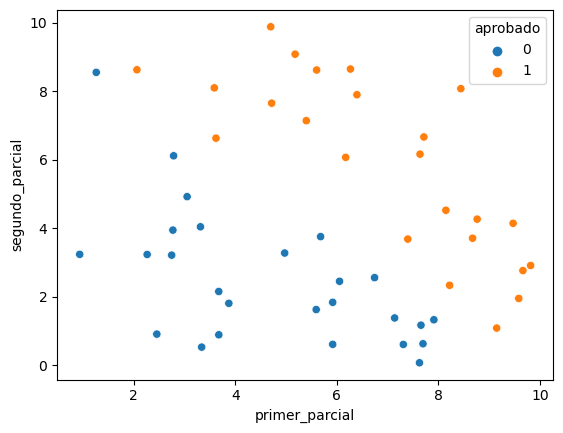

In [25]:
import seaborn as sns

sns.scatterplot(data=df, x='primer_parcial', y='segundo_parcial', hue="aprobado");

In [29]:
X = df[['primer_parcial', 'segundo_parcial']]
y = df.aprobado

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [33]:
pred = model.predict(X)
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1])

p = 0.05 * primer_parcial + 0.05 * segundo_parcial 

In [40]:
df['prediction'] = pred
(df.aprobado == df.prediction).mean()

1.0

In [41]:
model.coef_

array([[1.59850967, 1.5640994 ]])

In [42]:
model.intercept_

array([-15.89170895])

In [47]:
pred_proba = model.predict_proba(X)[:, 1]

In [48]:
pred_proba.shape

(50,)

In [53]:
pred_proba[:5]

array([0.98732566, 0.99857188, 0.60549646, 0.08446814, 0.92486932])

In [52]:
pred == (pred_proba > 0.5)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [56]:
threshold = 0.6
custom_prediction = pred_proba > threshold

custom_prediction.mean()

0.46

In [57]:
threshold = 0.9
custom_prediction = pred_proba > threshold

custom_prediction.mean()

0.38

In [58]:
threshold = 0.99
custom_prediction = pred_proba > threshold

custom_prediction.mean()

0.2

In [59]:
threshold = 0.1
custom_prediction = pred_proba > threshold

custom_prediction.mean()

0.6

In [60]:
threshold = 0.001
custom_prediction = pred_proba > threshold

custom_prediction.mean()

0.9

# Métricas de error

In [76]:
fake_neg_prediction = np.random.uniform(0, 0.7, 50)
fake_pos_prediction = np.random.uniform(0.4, 1, 50)
y_true = np.array([0] * 50 + [1] * 50)
prediction = np.concatenate([fake_neg_prediction, fake_pos_prediction])

In [99]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

Precission: 0.7735849056603774
Recall: 0.82
F1-score: 0.796116504854369


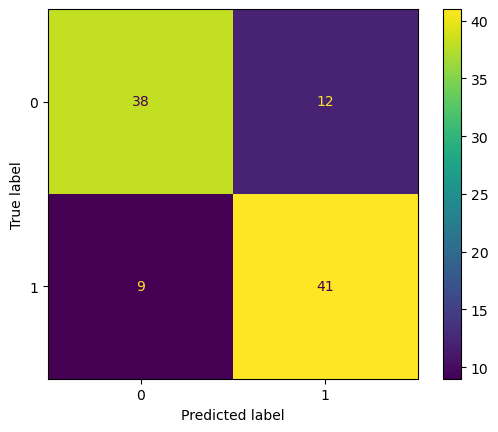

In [105]:
threshold = 0.5
labels = [0, 1]

custom_prediction = prediction > threshold
cm = confusion_matrix(y_true, 
                      custom_prediction, 
                      labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
print("Precission:", precision_score(y_true=y_true, y_pred=custom_prediction))
print("Recall:", recall_score(y_true=y_true, y_pred=custom_prediction))
print("F1-score:", f1_score(y_true=y_true, y_pred=custom_prediction))
disp.plot()
plt.show()

Un umbral muy alto conduce a:
- Aumenta los FN falsos negativos -> mejora precission
- Minimiza los FP falsos positivos -> empeora recall

Un umbral de 1.0 implica una precission del 100 %

Precission: 0.8333333333333334
Recall: 0.7
F1-score: 0.7608695652173915


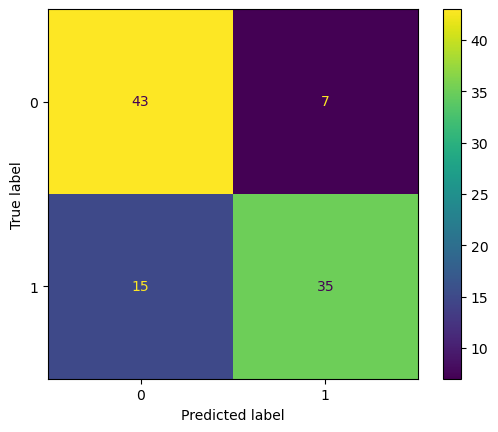

In [106]:
threshold = 0.6
labels = [0, 1]

custom_prediction = prediction > threshold
cm = confusion_matrix(y_true, 
                      custom_prediction, 
                      labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
print("Precission:", precision_score(y_true=y_true, y_pred=custom_prediction))
print("Recall:", recall_score(y_true=y_true, y_pred=custom_prediction))
print("F1-score:", f1_score(y_true=y_true, y_pred=custom_prediction))
disp.plot()
plt.show()

Precission: 1.0
Recall: 0.42
F1-score: 0.5915492957746479


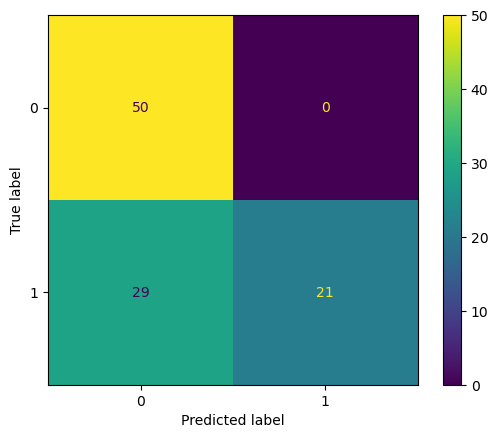

In [107]:
threshold = 0.7
labels = [0, 1]

custom_prediction = prediction > threshold
cm = confusion_matrix(y_true, 
                      custom_prediction, 
                      labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
print("Precission:", precision_score(y_true=y_true, y_pred=custom_prediction))
print("Recall:", recall_score(y_true=y_true, y_pred=custom_prediction))
print("F1-score:", f1_score(y_true=y_true, y_pred=custom_prediction))
disp.plot()
plt.show()

Un umbral muy bajo conduce a:
- Aumenta los FP falsos positivos -> aumenta el recall
- Minimiza los falsos negativos -> disminuye la precission

Un umbral de 0.0 implica un recall del 100 %

Precission: 0.734375
Recall: 0.94
F1-score: 0.8245614035087719


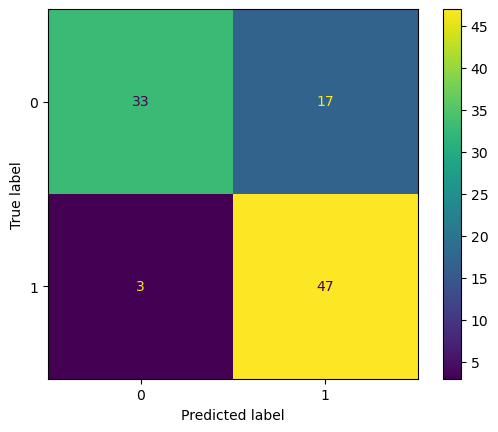

In [108]:
threshold = 0.45
labels = [0, 1]

custom_prediction = prediction > threshold
cm = confusion_matrix(y_true, 
                      custom_prediction, 
                      labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
print("Precission:", precision_score(y_true=y_true, y_pred=custom_prediction))
print("Recall:", recall_score(y_true=y_true, y_pred=custom_prediction))
print("F1-score:", f1_score(y_true=y_true, y_pred=custom_prediction))
disp.plot()
plt.show()

Precission: 0.7142857142857143
Recall: 1.0
F1-score: 0.8333333333333333


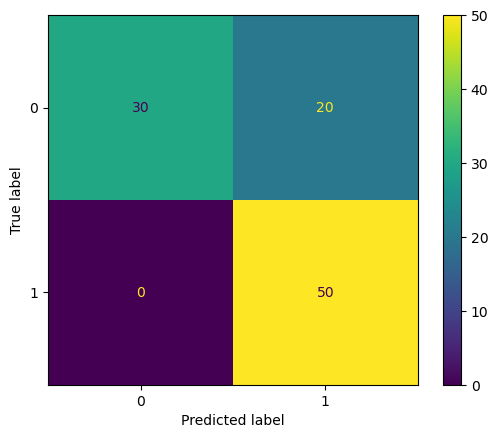

In [109]:
threshold = 0.4
labels = [0, 1]

custom_prediction = prediction > threshold
cm = confusion_matrix(y_true, 
                      custom_prediction, 
                      labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
print("Precission:", precision_score(y_true=y_true, y_pred=custom_prediction))
print("Recall:", recall_score(y_true=y_true, y_pred=custom_prediction))
print("F1-score:", f1_score(y_true=y_true, y_pred=custom_prediction))
disp.plot()
plt.show()

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score([0, 1,], 
               [1, 0])

0.0

In [90]:
accuracy_score([0, 1,], [0, 1])

1.0

In [91]:
accuracy_score([0, 1, 1], [0, 1, 0])

0.6666666666666666

Accuracy es una métrica muy limitada porque absorbe la distribución de las etiquetas.

En un escenario donde hay un 99 % de casos legales, predecir que todos los casos son legales, tiene el 99 % de accuracy -> lidera al engaño o confusión

In [92]:
accuracy_score(y_true=y_true, y_pred=(prediction > 0.6))

0.78

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_true=[0, 1, 1, 0, 0, 0, 1, 0, 1], y_pred=[1, 1, 0, 0, 0, 0, 0, 0 ,0])

0.5

In [97]:
precision_score(y_true=y_true, y_pred=(prediction > 0.6))

0.8333333333333334

In [98]:
recall_score(y_pred=[0, 1, 1, 0, 0, 0, 1, 0, 1], y_true=[1, 1, 0, 0, 0, 0, 0, 0 ,0])

0.5

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y, y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Requisitos de operativa:

- **Tener al menos el 80 % de precission y al menos un 40 % de recall**
- **MAXIMIZAR F1-score**
- En un mantenimiento predictivo, es necesario que el 70 % de las ocasiones que se predice fallo de una pieza, realmente lo sea
- En un mantenimiento predictivo, es necesario que el 80 % de las ocasiones en las que va a fallar, se detecte
- En la detección del fraude, necesitamos tener una precission del 90 %
- Necesitamos que este sistema de diagnóstico del edema macular, tenga un recall de al menos el 99 %